## Discrete Bak Sneppen model

In the discrete Bak-Sneppen model [2], each node on a circle of is given a fitness of either $0$ or $1$. Then a node with fitness zero is chosen uniformly at random. This node together with its two neighbors are replaced by three nodes,  each of which has a fitness $1$ with probability $p$ and $0$ with probability $1-p$. 

You can think of this model as if someone at work has Covid-19 😷️.
So they and their coworkers have to go home and be replaced by people who (unfortunately) may or may not have Covid-19.

## An example

For example, suppose initially the cycle looks like this.

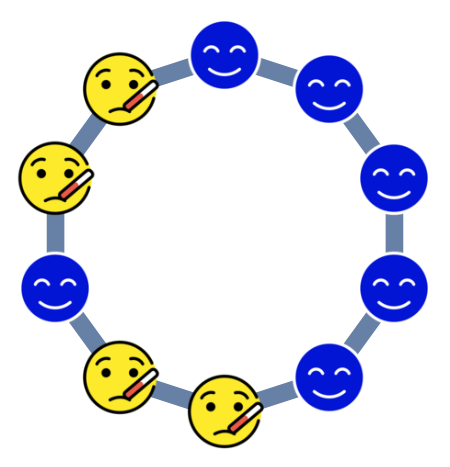

Then the top node together with its two neighbors are selected.

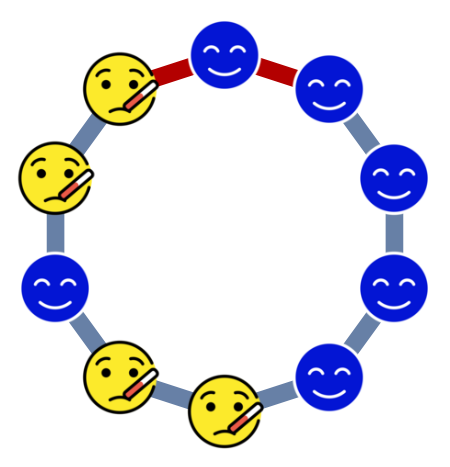

Three new nodes come to replace them, each with a random fitness. And the graph looks like this now.

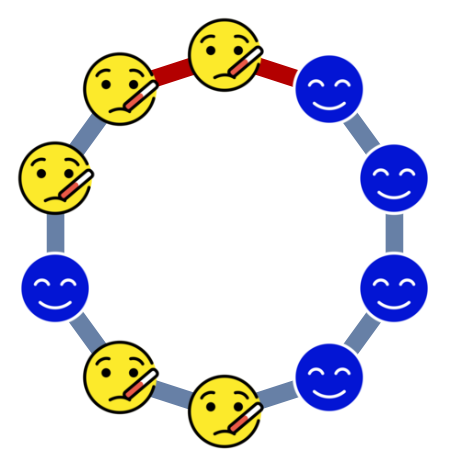

## A phase transition

It has been observed for a long time that if $p > 0.36$, then almost all nodes eventual will have fitness $1$. Otherwise we will always have some nodes with fitness $0$. 
A [recent paper](https://arxiv.org/abs/2003.00222) by Stanislav Volkov [1] proved the first part for $p > 0.411$. 
For the second part an [old paper](https://www.semanticscholar.org/paper/Non-Triviality-of-a-Discrete-Bak%E2%80%93Sneppen-Evolution-Meester-Znamenski/050d3597f5412ad6c1e9043b2200aab4731fff27) [3] show that it is true for $p<p_c$ where $p_c$ is very small but non-zero constant. So the problem now is if this gap can actually be closed.

## Bak-Sneppen on positive integers with two replacement

It seems a bit difficult to actually prove the threshold exists for Bak-Sneppen. So I come up with a model that may be a slightly easier to analyze. 

It works as follows

1. Put a label 1 😀️ on all positive integers $\ge 2$. Put label 0 😷️ on integer $1$.
2. Choose an integer $u$ with label 0 uniformly at random. 
3. Change the label of this integer to 1 with probability $p$, and keep it as $0$ with probability $1-p$. 
4. Do the same for the for the integer $u+1$.
5. We say the process dies if there is no 0 integers left.

We call the difference between the largest and the smallest integer with a label 0  the _diameter_ of the process.

Here's my conjecture

1. If $p > 0.24$, then the process dies with probability $1$
2. If $p \in (0, 0.23)$, then the process has positive probability to run forever.
3. If we instead consider running the process on $\{1,\dots, n\}$, then with probability $1$ the process dies

## Phase transition

In the simulation, if the process dies we just restart it.

In [ ]:
ENV["GKS_ENCODING"]="utf8"
using Plots; using Pkg; Pkg.activate("..");
using Revise, BakSneppenSimulation

For $p<0.23$, the picture looks like this. As you can see, the diameter and number of zeros all goes up forever.

The case $p=0.05$.

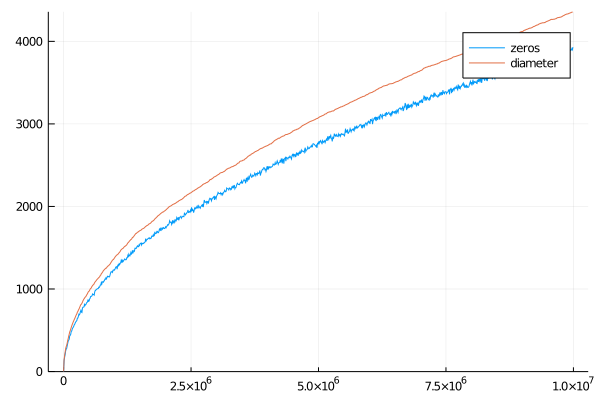

In [3]:
plotdata(simdirected(1000, 0.05, 2, 10^7))

The case $p=0.23$

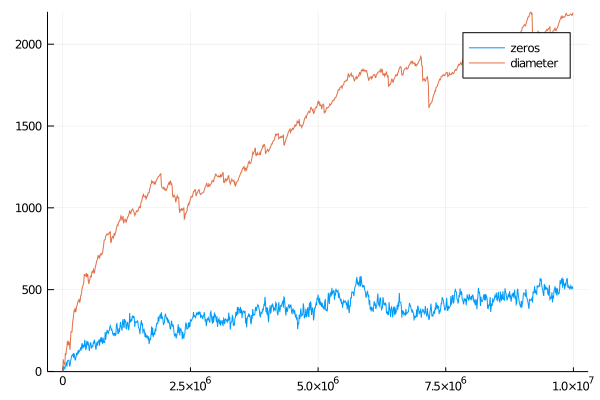

In [4]:
plotdata(simdirected(1000, 0.23, 2, 10^7))

For $p=0.24$, it is clear that the process dies every time it starts

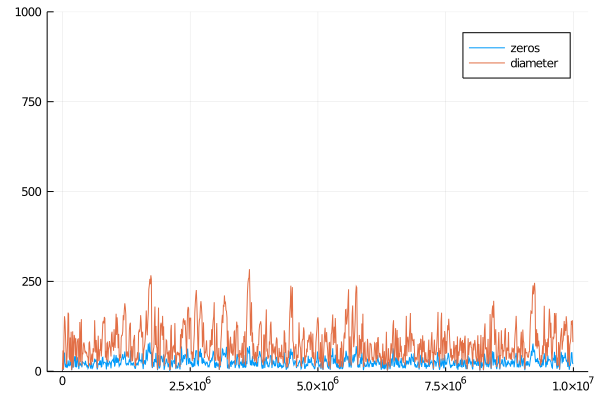

In [5]:
plotdata(simdirected(1000, 0.24, 2, 10^7),1000)

## Bounded interval

A more surprising thing happens when the process is limited to the set integers $\{1, \dots, n\}$ for some large $n$.
For three replacements and $p < 0.36$, the process stabilize once it hits the boundary.

This is the case $p=0.35$ with boundary at $1000$ for three replacement, as in the original model. As you can see, both the diameter and number of zeros stay stable.

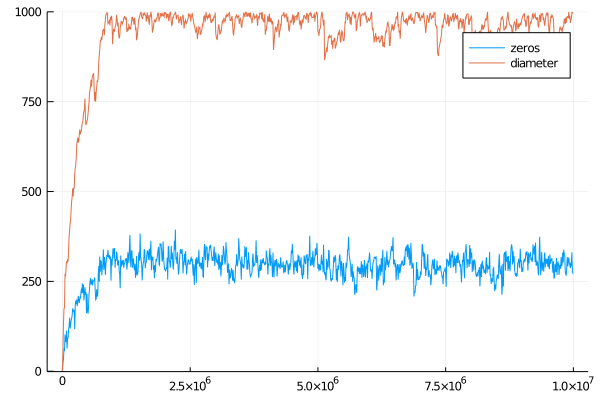

In [24]:
plotdata(BakSneppenSimulation.simdirectedbounded(1000, 0.35, 3, 10^7), 1000)

However, for two mutations, this is not the case. It always collapses once it hits the boundary.
The case $p=0.1$ with boundary at $1000$ for two mutations. The process takes nose dive once it's close to the boundary.

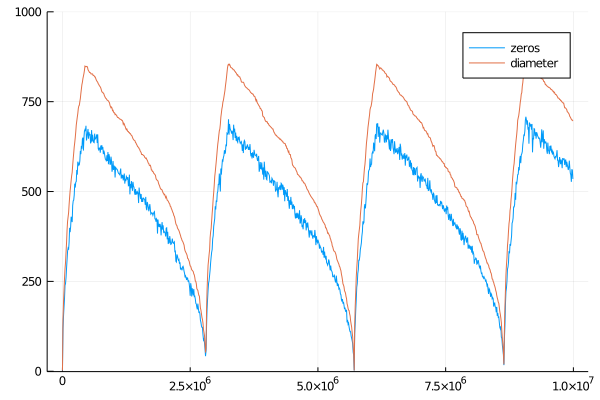

In [18]:
plotdata(BakSneppenSimulation.simdirectedbounded(1000, 0.1, 2, 10^7), 1000)

Even if we set $p=0.01$, somehow the adding boundary still makes the process steadily die out. I did a particularly long simulation for it. It goes down very slowly but always do so.

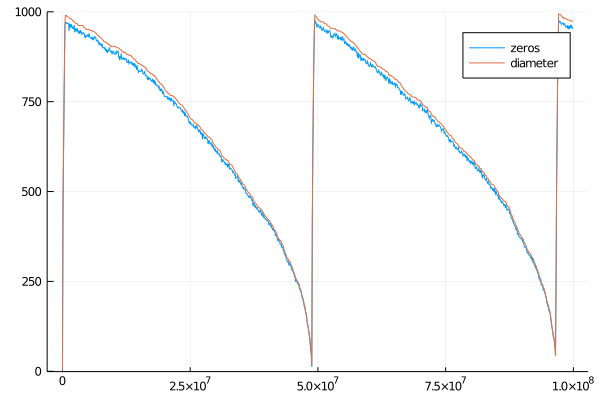

In [23]:
plotdata(BakSneppenSimulation.simdirectedbounded(1000, 0.01, 2, 10^8), 1000)

Let me know if you have any comments!

### Reference

[1] S. Volkov, “Rigorous upper bound for the discrete Bak-Sneppen model,” arXiv:2003.00222 [math], Feb. 2020 [Online]. Available: http://arxiv.org/abs/2003.00222. [Accessed: 23-Apr-2020]

[2] J. Barbay and C. Kenyon, “On the discrete Bak-Sneppen model of self-organized criticality,” in Proceedings of the twelfth annual ACM-SIAM symposium on Discrete algorithms, Washington, D.C., USA, 2001, pp. 928–933. 

[3]R. Meester and D. Znamenski, “Non-triviality of a discrete Bak-Sneppen evolution model,” arXiv:cond-mat/0301480, Jan. 2003 [Online]. Available: http://arxiv.org/abs/cond-mat/0301480. [Accessed: 24-Apr-2020]